In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
digits.data[0,:]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [3]:
import numpy as np
zero = digits.data[0,:].reshape((8,8))
np.allclose(zero,digits.images[0])

True

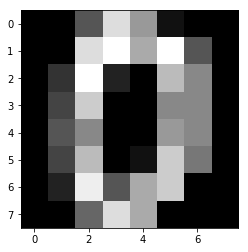

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(zero, cmap = "gray")

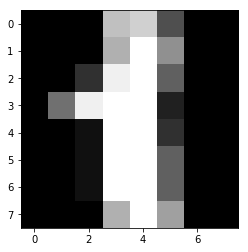

In [5]:
plt.imshow(digits.images[1], cmap = "gray")

In [6]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C= 100)
clf.fit(digits.data[:-1,:],digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

In [11]:
#clf.predict(digits.data[-1,])
#print digits.data[-1:].shape  # this returns a 2D array
#print digits.data[-1].shape   # these don't
#print digits.data[-1,:].shape

(100L, 64L) (100L,)
(110L, 64L) (110L,)
(120L, 64L) (120L,)
(130L, 64L) (130L,)
(140L, 64L) (140L,)
(150L, 64L) (150L,)
(160L, 64L) (160L,)
(170L, 64L) (170L,)
(180L, 64L) (180L,)
(190L, 64L) (190L,)
(200L, 64L) (200L,)
(210L, 64L) (210L,)
(220L, 64L) (220L,)
(230L, 64L) (230L,)
(240L, 64L) (240L,)
(250L, 64L) (250L,)
(260L, 64L) (260L,)
(270L, 64L) (270L,)
(280L, 64L) (280L,)
(290L, 64L) (290L,)
(300L, 64L) (300L,)
(310L, 64L) (310L,)
(320L, 64L) (320L,)
(330L, 64L) (330L,)
(340L, 64L) (340L,)
(350L, 64L) (350L,)
(360L, 64L) (360L,)
(370L, 64L) (370L,)
(380L, 64L) (380L,)
(390L, 64L) (390L,)
(400L, 64L) (400L,)
(410L, 64L) (410L,)
(420L, 64L) (420L,)
(430L, 64L) (430L,)
(440L, 64L) (440L,)
(450L, 64L) (450L,)
(460L, 64L) (460L,)
(470L, 64L) (470L,)
(480L, 64L) (480L,)
(490L, 64L) (490L,)
(500L, 64L) (500L,)
(510L, 64L) (510L,)
(520L, 64L) (520L,)
(530L, 64L) (530L,)
(540L, 64L) (540L,)
(550L, 64L) (550L,)
(560L, 64L) (560L,)
(570L, 64L) (570L,)
(580L, 64L) (580L,)
(590L, 64L) (590L,)


Text(0,0.5,u'Prediction Accuracy')

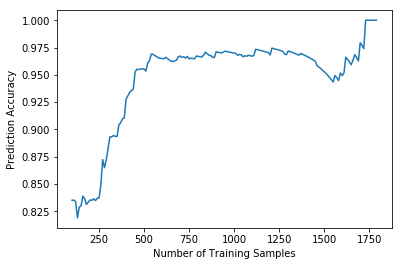

In [20]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C= 100)

def accuracy(m):
    train_data = digits.data[:m]
    train_target = digits.target[:m]
    test_data = digits.data[m:]
    test_target = digits.target[m:]
    print train_data.shape, train_target.shape 
    n = len(test_target)
    clf.fit(train_data,train_target)
    #print clf.predict(test_data), test_target
    return sum(clf.predict(test_data)==test_target)*1.0/n

l = len(digits.target)
m = range(100,l,10)
p = [accuracy(i) for i in m]
plt.plot(m,p)
plt.xlabel("Number of Training Samples")
plt.ylabel("Prediction Accuracy")

In [23]:
l = len(digits.target)
m = 1000
accuracies = []
num_trials = 10
for i in range(num_trials):
    train_i = np.random.choice(l,m, False)
    #train_i = np.arange(m)
    all_i = np.arange(l)
    all_i[train_i] = -1
    test_i = all_i[all_i > -1]

    train_data = digits.data[train_i,:]
    train_target = digits.target[train_i]
    test_data = digits.data[test_i]
    test_target = digits.target[test_i]
    print digits.data.shape, digits.target.shape 
    print train_data.shape, train_target.shape 
    clf.fit(train_data,train_target)
    accuracy = sum(clf.predict(test_data)==test_target)*1.0/(l-m)
    accuracies.append(accuracy)


(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)
(1797L, 64L) (1797L,)
(1000L, 64L) (1000L,)


(array([   4.,    4.,   10.,   25.,   40.,   64.,  103.,  139.,  147.,
         165.,  136.,   77.,   48.,   24.,   14.]),
 array([ 0.97741531,  0.97875366,  0.98009201,  0.98143036,  0.98276872,
         0.98410707,  0.98544542,  0.98678377,  0.98812212,  0.98946048,
         0.99079883,  0.99213718,  0.99347553,  0.99481389,  0.99615224,
         0.99749059]),
 <a list of 15 Patch objects>)

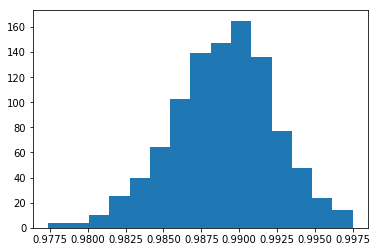

In [15]:
plt.hist(accuracies,bins= 15)

In [24]:
l = len(digits.target)
m = 1000
accuracies = []
num_trials = 1
train_i = np.arange(m)
for i in range(num_trials):
    train_i = np.random.permutation(train_i)
    all_i = np.arange(l)
    all_i[train_i] = -1
    test_i = all_i[all_i > -1]
    print train_i, test_i
    train_data = digits.data[train_i,:]
    train_target = digits.target[train_i]
    test_data = digits.data[test_i]
    test_target = digits.target[test_i]
    clf.fit(train_data,train_target)
    accuracy = sum(clf.predict(test_data)==test_target)*1.0/(l-m)
    accuracies.append(accuracy)
len(set(accuracies)) # only one accuracy regardless of order trained

[171 569 634  86 548 708 511 303  81 933 395 710  72 381 544 895  76 479
  75 312 366 270  62 795 768 161  10 153 936 354  27  31 909 135 560 956
 698 779 358  29 123 940 739 522 941 500 120   0 623 761 408 992 685 870
 628 173 246 137 273 194  90 850 441 808 376 535 617 889 375 988 332 400
 184 240 530 666 540 579 266 822 319 238 106 622 880 105 304 855 145 255
  50   5 884 979 679  32  92 301 703 215 827 668 888  66 774 486 329 778
 647 539 695 954 833 495  89 214  22 793 373 456 759 586 601 493 734 455
 911 320   4 747 534 960 672  37 794 192 669 624 890 234 507 843 796 165
 864 296 280 424 428 111 223 650 965 729 705 690 620  79 180 250 829 228
 646 697 370 727 857 344 440 382  13 496 305 882 696 367 782 912  16 406
  94 302 467 286 409 475 298 212 310 817 279 140 318 715 551 124 757 130
 377 506 141 755 235  36  88  38 425 813 297 380 887 517 592 550 951 353
  44 610 129 741 818 844 538 915 127 711 955 179 365   9 688 146 275 411
 333 458 242  48 119 183 465 327 457 619 760 562  5

1

In [17]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150L, 4L)

In [118]:
digits = datasets.load_digits()
digits.images.shape


(1797L, 8L, 8L)

In [121]:
data = digits.images.reshape(len(digits.images),64)
print data.shape
print digits.data.shape

(1797L, 64L)
(1797L, 64L)


In [122]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
set(iris_y)

{0, 1, 2}

In [137]:
indices = np.random.permutation(len(iris_X))
N = 10
iris_X_train = iris_X[indices[:-N]]
iris_y_train = iris_y[indices[:-N]]
iris_X_test = iris_X[indices[-N:]]
iris_y_test = iris_y[indices[-N:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
print knn.predict(iris_X_test)
print iris_y_test # truthe
print knn.predict(iris_X_test) == iris_y_test

[1 2 2 1 0 2 1 2 2 2]
[1 2 2 1 0 2 1 2 2 1]
[ True  True  True  True  True  True  True  True  True False]


In [139]:
from sklearn import svm
svc = svm.SVC(kernel = "linear")
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
print svc.predict(iris_X_test) == iris_y_test

[ True  True  True  True  True  True  True  True  True  True]


In [144]:
import pickle
# s= pickle.dumps(svc) # dumps to a string

with open("mysvc.dat","w") as f:
    pickle.dump(svc,f)

with open("mysvc.dat","r") as f:
    svc2= pickle.load(f)
    
print svc2.predict(iris_X_test) == iris_y_test

[ True  True  True  True  True  True  True  True  True  True]
